# 1.0 Objective

- Design a **predictive model to determine potential customers who will make a purchase if we send them advertisements.** The target variable is `Potential_Customer`. 

## 1.1 Import packages and data

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

# preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA

# modelling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# model evaluation

from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, \
                                RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to create model object
import pickle

In [2]:
df = pd.read_csv('data.csv', na_filter = True)

In [3]:
df.shape

(4469, 25)

In [4]:
df.head()

Potential_Customer    C_ID Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                   1    9946             $5.00             2           17   
1                   1   87939            $30.00             1            7   
2                   0   88003                NaN            5           12   
3                   1  188721            $20.00             1           11   
4                   1   88056             $5.00             3           15   

   Pur_3_years_Indirect  Pur_5_years_Indirect Pur_latest Pur_3_years_Avg  \
0                     2                     4     $0.00           $7.50    
1                     0                     3    $25.00          $25.00    
2                     3                     5    $15.00          $15.00    
3                     0                     3    $20.00          $20.00    
4                     2                     7     $3.00           $4.33    

  Pur_5_years_Avg Pur_3_years_Avg_Indirect  InAct_Last  InAct_First  \
0          $7.76                    $7.50           14          110   
1         $13.00                       NaN          18           75   
2         $11.25                   $14.67           19           57   
3         $12.45                       NaN           5          113   
4          $3.80                    $4.00           17          118   

   Ad_Res_1_year  Ad_Res_3_Year  Ad_Res_5_Year  Ad_Res_Ind_1_Year  \
0             32             48             73                  3   
1             13             35             55                  6   
2             14             35             53                  6   
3             17             38             71                  8   
4             13             28             63                  6   

   Ad_Res_Ind_3_Year  Ad_Res_Ind_5_Year Status_Cust  Status_Latest_Ad   Age  \
0                 12                 16           A                 0 71.00   
1                  6                 22           A                 1  7.00   
2                 17                 22           S                 1 79.00   
3                  8                 33           A                 0 73.00   
4                 12                 24           S                 1 68.00   

  Gender Cust_Prop Cust_Ann_Income  
0      F         H     $65,957.00   
1      M         U          $0.00   
2      F         U          $0.00   
3      F         U     $76,293.00   
4      F         H    $113,663.00

# 2.0 Data Cleaning

## 2.1 Check for correct data types

We notice that several columns (e.g., `Potential_Customer`,`Status_Cust`, `Status_Latest_Ad`,`C_ID`, `Gender`, `Cust_Prop`) have the wrong data types. They ought to be `categorical` data but are instead of the `object`/`integer`/`float` data type. Additionally, several columns have values with `$` signs.  Hence, we'll adjust this. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.1.1 Remove the dollar sign and comma from data

In [6]:
df.Cust_Last_Purchase=df.Cust_Last_Purchase.str.replace('$', '')
df.Pur_latest=df.Pur_latest.str.replace('$', '')
df.Pur_3_years_Avg=df.Pur_3_years_Avg.str.replace('$', '')
df.Pur_5_years_Avg=df.Pur_5_years_Avg.str.replace('$', '')
df.Pur_3_years_Avg_Indirect=df.Pur_3_years_Avg_Indirect.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace(',', '')

### 2.1.2 Correct data types

In [7]:
df.head()

Potential_Customer    C_ID Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                   1    9946              5.00             2           17   
1                   1   87939             30.00             1            7   
2                   0   88003                NaN            5           12   
3                   1  188721             20.00             1           11   
4                   1   88056              5.00             3           15   

   Pur_3_years_Indirect  Pur_5_years_Indirect Pur_latest Pur_3_years_Avg  \
0                     2                     4      0.00            7.50    
1                     0                     3     25.00           25.00    
2                     3                     5     15.00           15.00    
3                     0                     3     20.00           20.00    
4                     2                     7      3.00            4.33    

  Pur_5_years_Avg Pur_3_years_Avg_Indirect  InAct_Last  InAct_First  \
0           7.76                     7.50           14          110   
1          13.00                       NaN          18           75   
2          11.25                    14.67           19           57   
3          12.45                       NaN           5          113   
4           3.80                     4.00           17          118   

   Ad_Res_1_year  Ad_Res_3_Year  Ad_Res_5_Year  Ad_Res_Ind_1_Year  \
0             32             48             73                  3   
1             13             35             55                  6   
2             14             35             53                  6   
3             17             38             71                  8   
4             13             28             63                  6   

   Ad_Res_Ind_3_Year  Ad_Res_Ind_5_Year Status_Cust  Status_Latest_Ad   Age  \
0                 12                 16           A                 0 71.00   
1                  6                 22           A                 1  7.00   
2                 17                 22           S                 1 79.00   
3                  8                 33           A                 0 73.00   
4                 12                 24           S                 1 68.00   

  Gender Cust_Prop Cust_Ann_Income  
0      F         H       65957.00   
1      M         U           0.00   
2      F         U           0.00   
3      F         U       76293.00   
4      F         H      113663.00

In [8]:
CatCols=['Potential_Customer','Status_Cust', 'Status_Latest_Ad','C_ID',
         'Gender', 'Cust_Prop']
NumCols=list(set(df.columns)-set(CatCols))

df[CatCols] = df[CatCols].apply(lambda x: x.astype('category'))
df[NumCols] = df[NumCols].apply(lambda x: x.astype('float64'))

# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   category
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

## 2.2 Check for duplicates

In [9]:
# check for duplicates
len(df[df.duplicated(subset=None, keep=False)])

1702

In [10]:
# # 851 duplicate rows dropped
df=df.drop_duplicates()
df.shape

(3618, 25)

## 2.3 Drop `C_ID` column

The unique `C_ID`'s for each customer won't be too useful for ML training. Hence, we'll delete this column. 

In [11]:
df.drop('C_ID', axis=1, inplace=True)

# final check
df.shape

(3618, 24)

In [12]:
CatCols.remove('C_ID')

# final check
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Gender',
 'Cust_Prop']

# 3.0 EDA

## 3.1 Explore Categorical Variables

In [13]:
df.describe(include=('category'))

Potential_Customer Status_Cust  Status_Latest_Ad Gender Cust_Prop
count                 3618        3618              3618   3618      3618
unique                   2           6                 2      3         2
top                      0           A                 1      F         H
freq                  1882        2146              2057   1922      1981

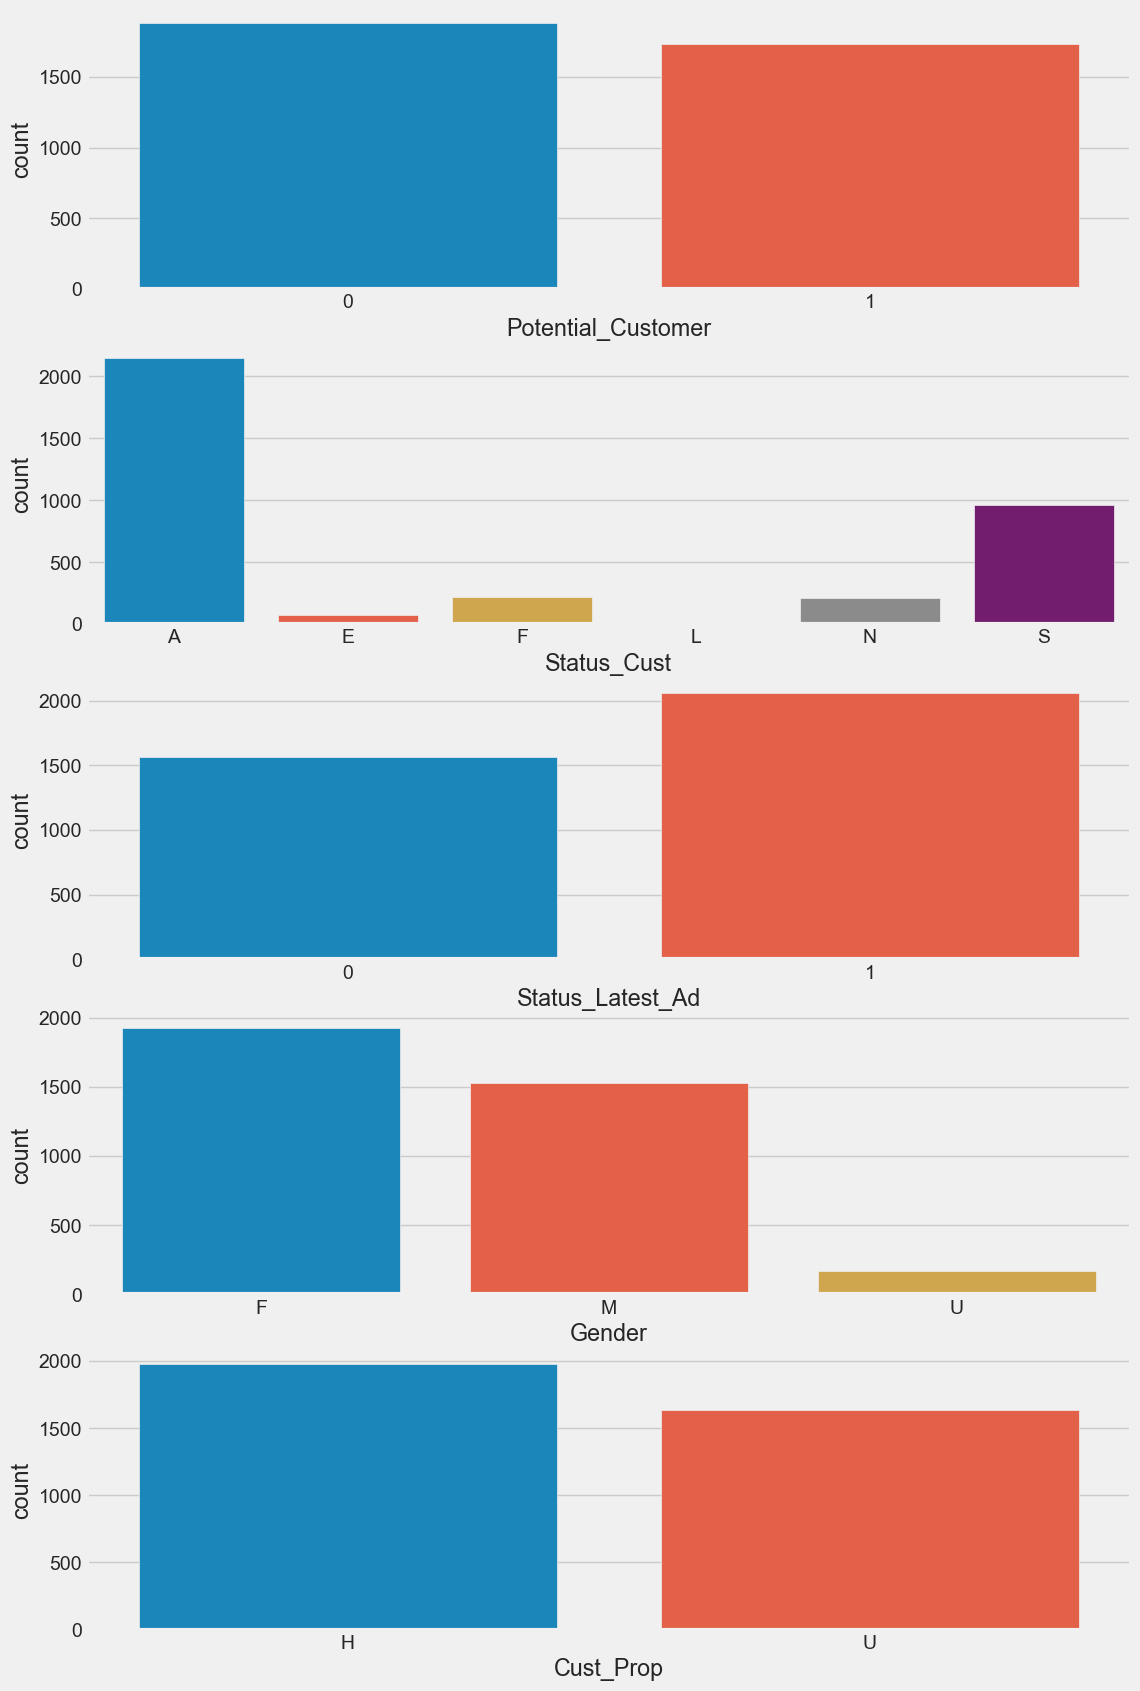

In [15]:
fig, ax=plt.subplots(nrows=len(CatCols), figsize=(12,20))
for i in np.arange(len(CatCols)): 
    sns.countplot(x=df[CatCols[i]],ax=ax[i]);

From the Bar plots below, we notice that `Status_Cust` has too many categories, with very small values. Hence, we'll using binning to reduce the number of categories. 

In [14]:
mapper = {'A':'A',
          'S':'S' ,
          'E': 'other', 
          'F': 'other',
          'N':'other',
          'L':'other' }

df['Status_Cust_new'] = df['Status_Cust'].replace(mapper)
CatCols = CatCols + ['Status_Cust_new']
CatCols.remove('Status_Cust')

## 3.2 Explore Continuous Variables

From the charts below, we glean the following insights: 
- Some variables are highly skewed and so we can use the log of them after filling missing values with median or other appropriate values.
- Some variables have outliers we should decide to remove/fix/keep them.
- Some values are also close to zero in the `Age` column, which signals us to investigate further.
- Some values in the `Cust_Ann_Income` column appear to be close to zero. Another point of investigation.

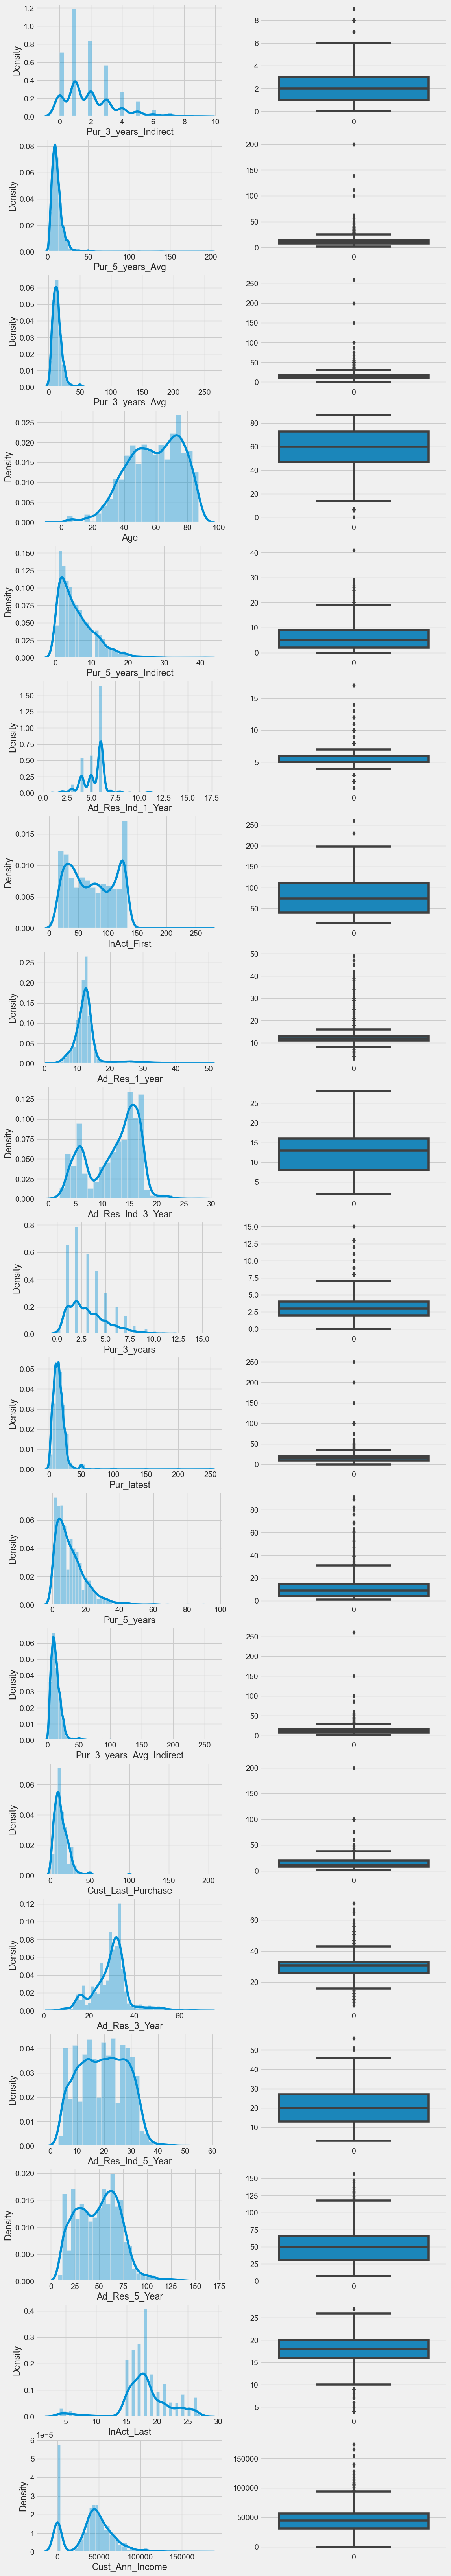

In [17]:
fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
for i in range(len(NumCols)):
    sns.distplot(df[NumCols[i]],ax=ax[i,0])
    sns.boxplot(df[NumCols[i]],ax=ax[i,1]);

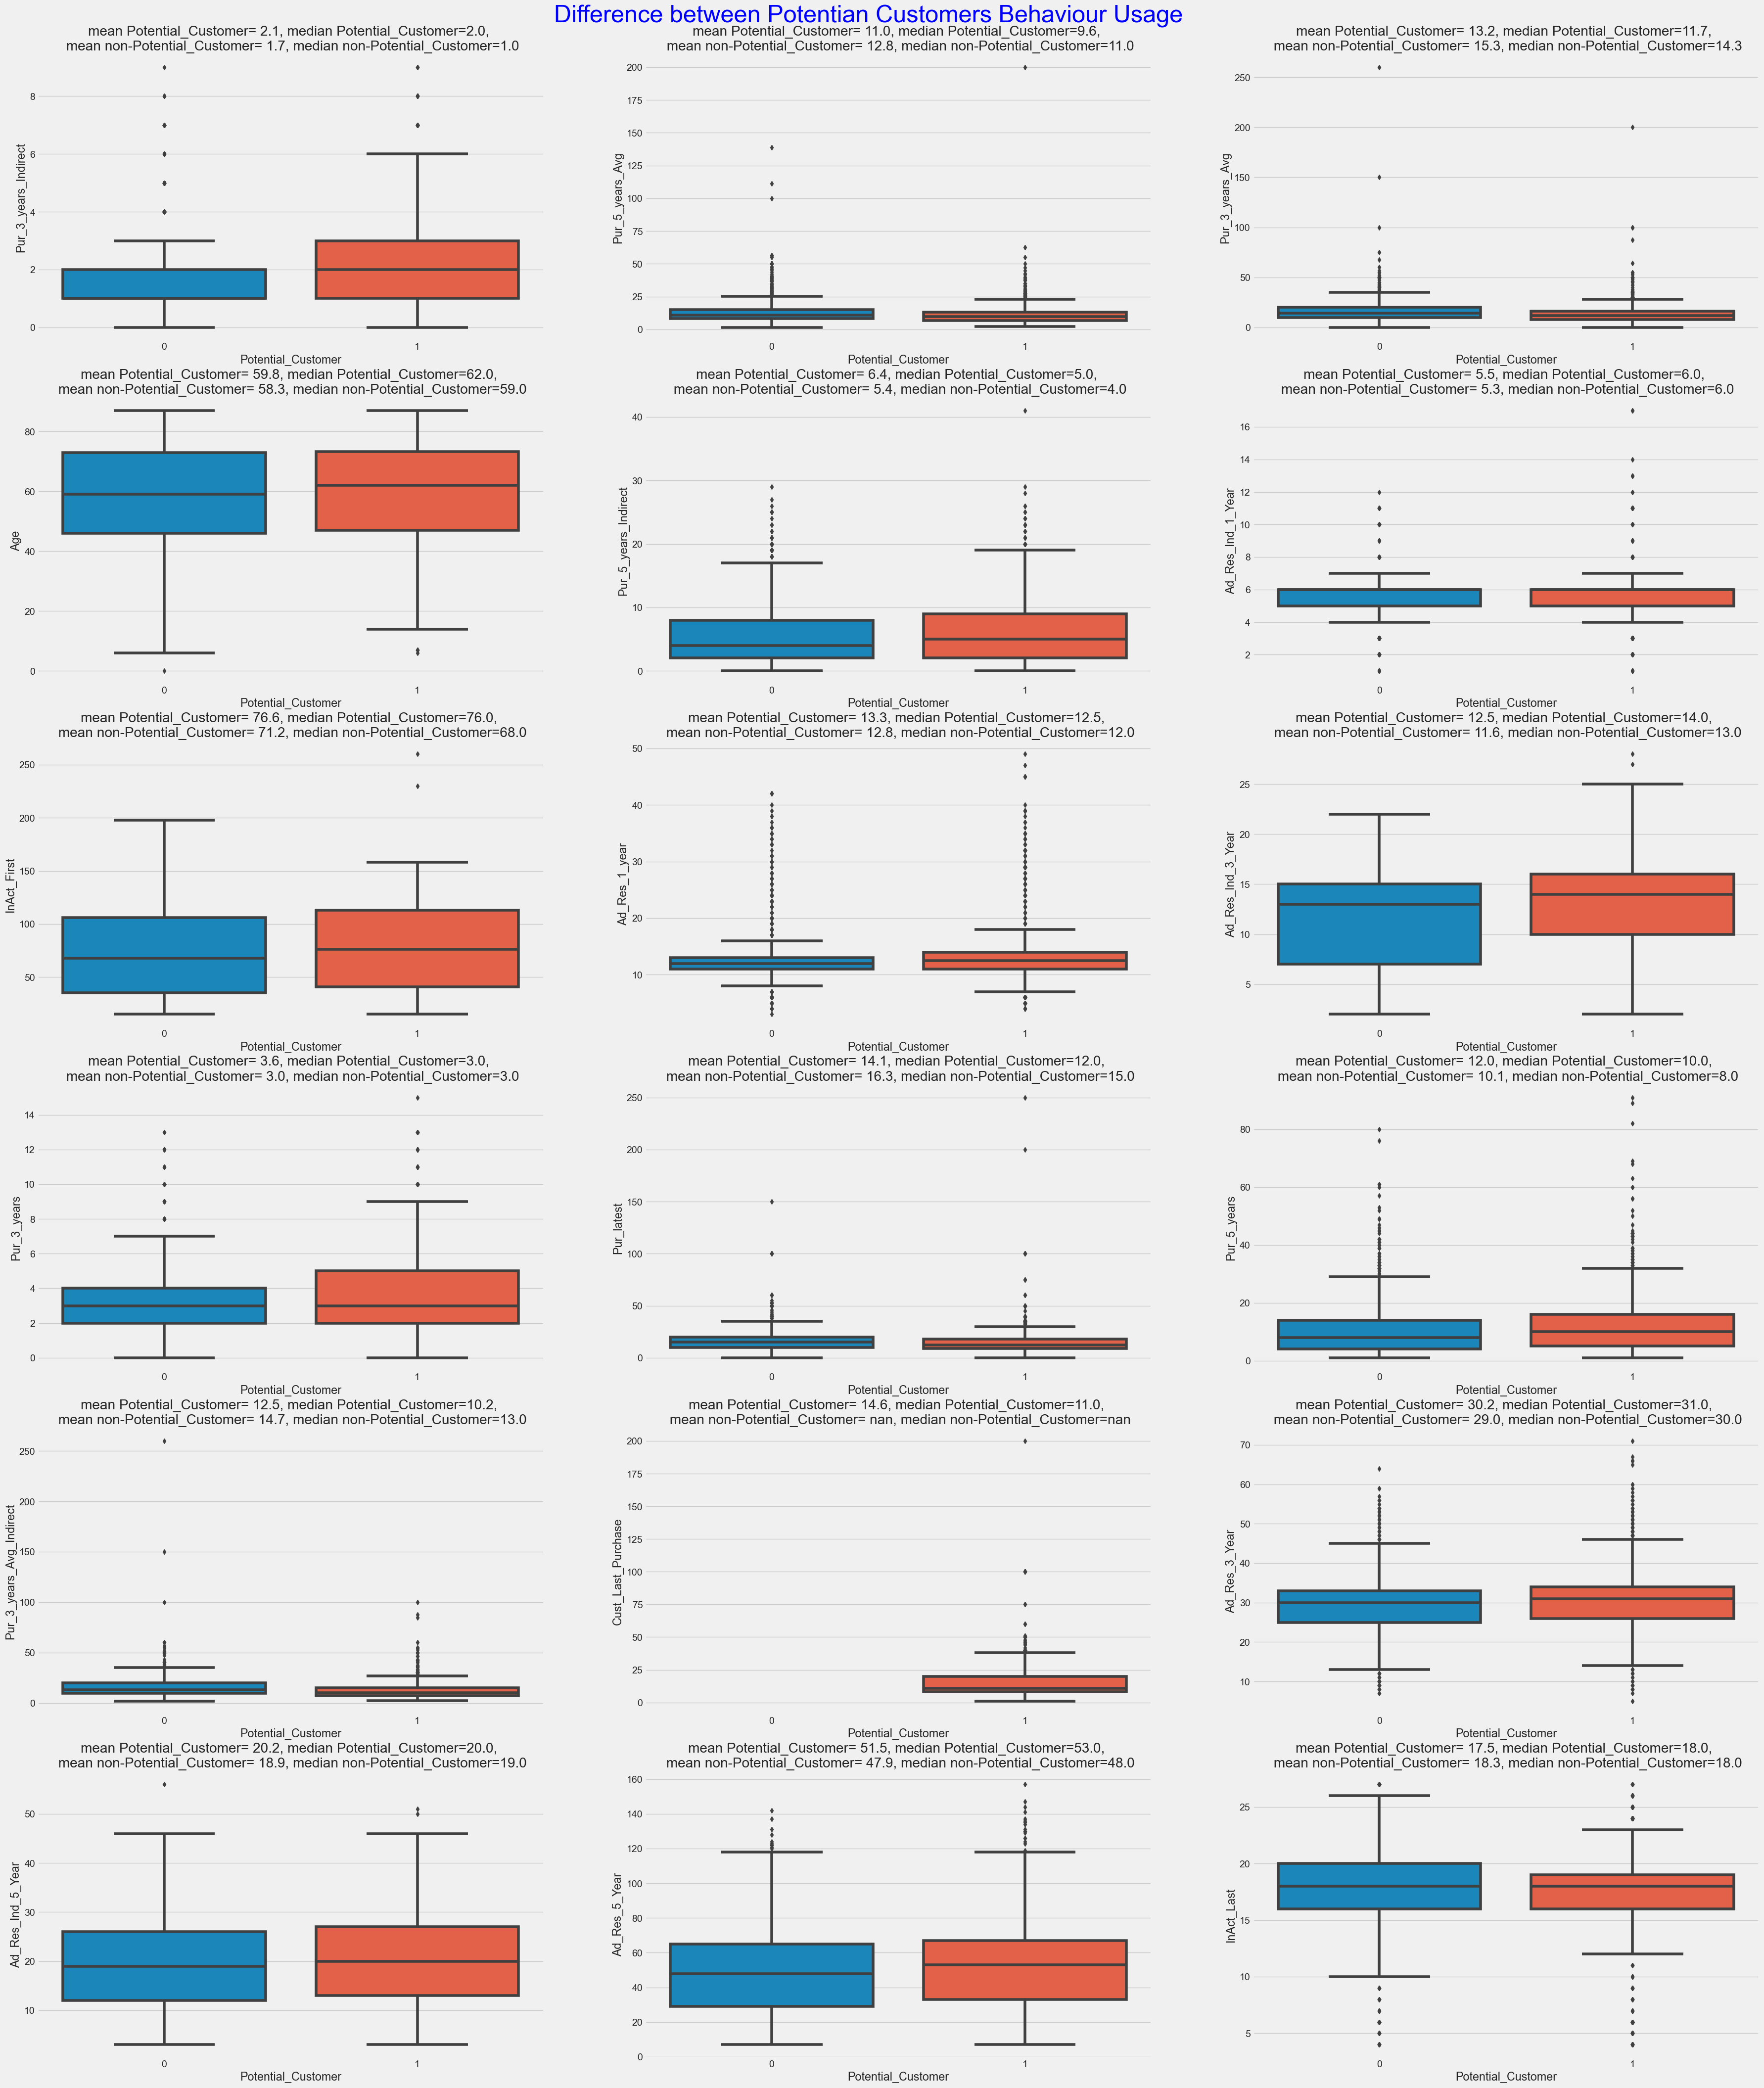

In [18]:
ncols=int(len(NumCols)/6)
fig , axes= plt.subplots(ncols=ncols, nrows=6, figsize=(40,50))
fig.suptitle('Difference between Potentian Customers Behaviour Usage',y=.9, fontsize=35, color='b')
for j in np.arange(0,6):
    for c in np.arange(0,ncols):
        sns.boxplot(x='Potential_Customer',y=df[NumCols[c+j*3]],data=df, ax=axes[j,c]).\
    set_title('mean Potential_Customer= {:.1f}, median Potential_Customer={:.1f}, \n mean non-Potential_Customer= {:.1f}, median non-Potential_Customer={:.1f}'.\
                             format(df[df.Potential_Customer==1][NumCols[c+j*3]].mean(), 
                                    df[df.Potential_Customer==1][NumCols[c+j*3]].median(),
                                    df[df.Potential_Customer==0][NumCols[c+j*3]].mean(), 
                                    df[df.Potential_Customer==0][NumCols[c+j*3]].median()))
plt.show()

### 3.2.1 Inspection on outliers/anomalies data

We identify **728 individuals who have 0 annual income**. However, we observe that the bulk of them are active/star buyers. Perhaps these individuals aren't participating in the labour force (e.g., unemployed, housewives, etc.). Hence, we'll leave them be in the dataset.

In [39]:

df.query('Cust_Ann_Income == 0')['Cust_Prop'].value_counts()

U    704
H     24
Name: Cust_Prop, dtype: int64

In [40]:
df.query('Cust_Ann_Income == 0')['Status_Cust_new'].value_counts()

A        401
S        208
other    119
Name: Status_Cust_new, dtype: int64

In [41]:
df.query('Cust_Ann_Income == 0')['Age'].describe()

count   319.00
mean     58.64
std      18.63
min       7.00
25%      45.00
50%      61.00
75%      74.00
max      87.00
Name: Age, dtype: float64

In [31]:
df.query('Cust_Ann_Income == 0').head()

Potential_Customer  Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
1                   1               30.00         1.00         7.00   
2                   0                 NaN         5.00        12.00   
21                  0                 NaN         5.00        10.00   
24                  0                 NaN         1.00        14.00   
25                  0                 NaN         5.00         8.00   

    Pur_3_years_Indirect  Pur_5_years_Indirect  Pur_latest  Pur_3_years_Avg  \
1                   0.00                  3.00       25.00            25.00   
2                   3.00                  5.00       15.00            15.00   
21                  3.00                  5.00       14.00            14.80   
24                  0.00                  5.00       17.00            17.00   
25                  1.00                  1.00       10.00             7.60   

    Pur_5_years_Avg  Pur_3_years_Avg_Indirect  InAct_Last  InAct_First  \
1             13.00                       NaN       18.00        75.00   
2             11.25                     14.67       19.00        57.00   
21            12.80                     14.67       22.00        77.00   
24            16.14                       NaN       26.00        81.00   
25             8.88                     10.00       15.00        44.00   

    Ad_Res_1_year  Ad_Res_3_Year  Ad_Res_5_Year  Ad_Res_Ind_1_Year  \
1           13.00          35.00          55.00               6.00   
2           14.00          35.00          53.00               6.00   
21          10.00          30.00          52.00               5.00   
24          11.00          32.00          61.00               5.00   
25          13.00          34.00          38.00               6.00   

    Ad_Res_Ind_3_Year  Ad_Res_Ind_5_Year Status_Cust Status_Latest_Ad   Age  \
1                6.00              22.00           A                1  7.00   
2               17.00              22.00           S                1 79.00   
21              15.00              20.00           A                1 77.00   
24               5.00              23.00           A                1 41.00   
25              16.00              16.00           A                0   NaN   

   Gender Cust_Prop  Cust_Ann_Income Status_Cust_new  
1       M         U             0.00               A  
2       F         U             0.00               S  
21      F         U             0.00               A  
24      M         U             0.00               A  
25      M         U             0.00               A

Since we noticed a lot of individuals aged 0 or below 18 (assuming that's the minimum age for labour) in the data, we do follow up inspection that yields the following: 
- That the majority have non-zero annual income; and
- The vast majority of them fall under the A/S type of customer (refer to `Status_Cust_new`). 

The above signals that these customers are far less likely to be below 18. This is perhaps due to faulty data entry or errors during data collection. Thus, we'll drop those with an `Age` less than or equal to 18. 

In [48]:
df.query('Age <= 18')['Age'].count()

41

In [45]:
df.query('Age <= 18')

Potential_Customer  Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
1                     1               30.00         1.00         7.00   
15                    0                 NaN         1.00        19.00   
36                    1               14.00         2.00         4.00   
69                    1               20.00         2.00         4.00   
101                   0                 NaN         4.00         8.00   
422                   0                 NaN         4.00        13.00   
431                   0                 NaN         3.00         6.00   
444                   0                 NaN         8.00        32.00   
523                   0                 NaN         3.00        18.00   
612                   0                 NaN         3.00         3.00   
803                   0                 NaN         8.00        30.00   
846                   1                5.00         5.00        24.00   
890                   1                3.00        12.00        44.00   
928                   0                 NaN         2.00         4.00   
941                   0                 NaN         8.00        10.00   
1071                  0                 NaN         4.00        17.00   
1080                  0                 NaN         3.00        35.00   
1083                  1               20.00         2.00        11.00   
1092                  0                 NaN         3.00        13.00   
1205                  1               10.00         6.00        18.00   
1306                  0                 NaN         3.00         6.00   
1501                  1               15.00         4.00         6.00   
1834                  1               15.00         2.00         5.00   
2208                  0                 NaN         7.00        24.00   
2353                  1               14.00         7.00        13.00   
2380                  1               12.00         4.00        12.00   
2412                  0                 NaN         6.00        13.00   
2499                  1              100.00         6.00        26.00   
2652                  1               16.00         1.00         6.00   
2654                  0                 NaN         6.00        29.00   
2736                  1               22.00         3.00        10.00   
2743                  1               10.00         1.00        19.00   
2794                  0                 NaN         3.00         4.00   
2865                  0                 NaN         4.00        35.00   
2960                  0                 NaN         5.00        32.00   
3097                  0                 NaN         2.00        12.00   
3185                  0                 NaN        12.00        32.00   
3257                  1               11.00         6.00         8.00   
3294                  0                 NaN         4.00        15.00   
3401                  0                 NaN         9.00        19.00   
3448                  0                 NaN         4.00        21.00   

      Pur_3_years_Indirect  Pur_5_years_Indirect  Pur_latest  Pur_3_years_Avg  \
1                     0.00                  3.00       25.00            25.00   
15                    1.00                 16.00       10.00            10.00   
36                    1.00                  1.00       15.00            12.50   
69                    1.00                  2.00       27.00            27.00   
101                   3.00                  4.00       14.00            14.00   
422                   3.00                  6.00       11.00             9.50   
431                   1.00                  2.00       20.00            11.67   
444                   6.00                 19.00        6.00             5.75   
523                   2.00                  7.00       10.00            10.00   
612                   1.00                  1.00       20.00            23.33   
803                   5.00                 20.0

### 3.2.2 Drop respondents with `Age` <= 0

In [49]:
# remove respondents with `Age` <=18
df = df.query('Age > 18')

# 4.0 Feature Engineering and Inspection

## 4.1 Feature Engineering

In [52]:
# Creating the total amount of purchase for the customers
df['Pur_5_years_Total']=df['Pur_5_years']*df['Pur_5_years_Avg']
df['Pur_3_years_Total']=df['Pur_3_years']*df['Pur_3_years_Avg']

# Creating the ad response rate
df['Ad_Res_Rate_3_years']=df['Pur_3_years']/(df['Ad_Res_3_Year']+df['Ad_Res_Ind_3_Year']+1)
df['Ad_Res_Rate_5_years']=df['Pur_5_years']/(df['Ad_Res_5_Year']+df['Ad_Res_Ind_5_Year']+1)

# Since some of our data is skewed, we'll employ logarithmic transformation to -
# transform the highly skewed variables to some more normalized variables.
df['log_Pur_3_years_Indirect']=np.log(df['Pur_3_years_Indirect']+1)
df['log_Pur_5_years_Indirect']=np.log(df['Pur_5_years_Indirect']+1)
df['log_Pur_latest']=np.log(df['Pur_latest']+1)
df['log_Pur_3_years']=np.log(df['Pur_3_years']+1)
df['log_Pur_5_years']=np.log(df['Pur_5_years']+1)
df['log_Pur_5_years_Total']=np.log(df['Pur_5_years_Total']+1)
df['log_Pur_3_years_Total']=np.log(df['Pur_3_years_Total']+1)
df['log_Pur_3_years_Avg_Indirect']=np.log(df['Pur_3_years_Avg_Indirect']+1)
df['log_Ad_Res_Rate_3_years']=np.log(df['Ad_Res_Rate_3_years']+1)
df['log_Ad_Res_Rate_5_years']=np.log(df['Ad_Res_Rate_5_years']+1)
df['log_Pur_3_years_Avg']=np.log(df['Pur_3_years_Avg']+1)
df['log_Pur_5_years_Avg']=np.log(df['Pur_5_years_Avg']+1)

NewCols=['Pur_3_years_Total', 'Pur_5_years_Total', 'Ad_Res_Rate_3_years', 'Ad_Res_Rate_5_years',
         'log_Pur_3_years_Indirect', 'log_Pur_5_years_Indirect','log_Pur_latest','log_Pur_3_years', 
         'log_Pur_5_years','log_Pur_5_years_Total', 'log_Pur_3_years_Total',
         'log_Pur_3_years_Avg_Indirect', 'log_Ad_Res_Rate_3_years', 'log_Ad_Res_Rate_5_years',
         'log_Pur_3_years_Avg', 'log_Pur_5_years_Avg']

NewNumCols=NewCols+NumCols

In [53]:
df[NewCols+['Potential_Customer']].groupby('Potential_Customer').median().T

Potential_Customer               0     1
Pur_3_years_Total            32.00 34.00
Pur_5_years_Total            81.96 88.00
Ad_Res_Rate_3_years           0.06  0.07
Ad_Res_Rate_5_years           0.11  0.14
log_Pur_3_years_Indirect      0.69  1.10
log_Pur_5_years_Indirect      1.61  1.79
log_Pur_latest                2.77  2.64
log_Pur_3_years               1.39  1.39
log_Pur_5_years               2.20  2.40
log_Pur_5_years_Total         4.42  4.49
log_Pur_3_years_Total         3.50  3.56
log_Pur_3_years_Avg_Indirect  2.66  2.46
log_Ad_Res_Rate_3_years       0.06  0.07
log_Ad_Res_Rate_5_years       0.11  0.13
log_Pur_3_years_Avg           2.75  2.56
log_Pur_5_years_Avg           2.48  2.37

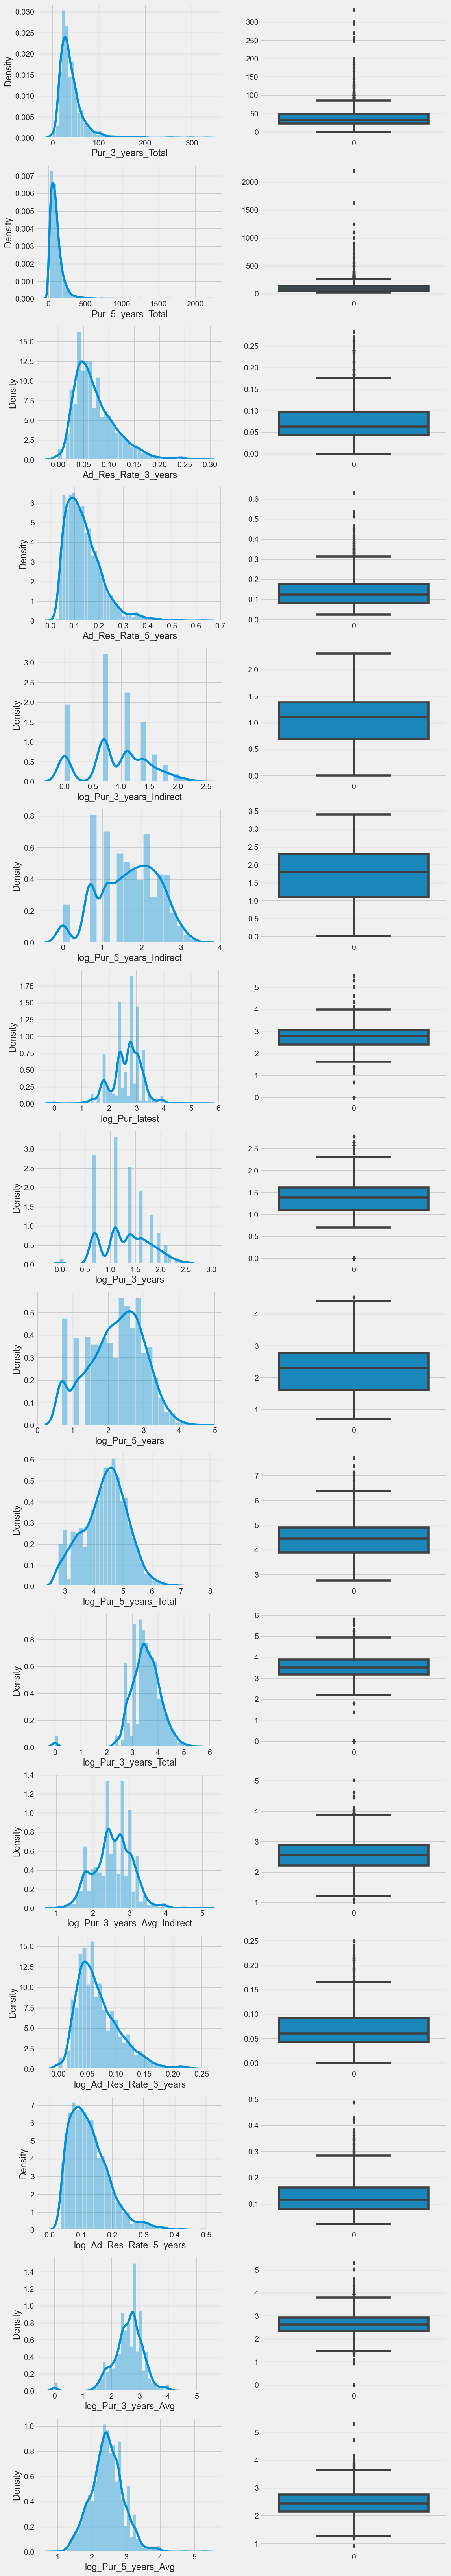

In [54]:
fig, ax=plt.subplots(nrows=len(NewCols), ncols=2, figsize=(12,80))
for i in range(len(NewCols)):
    sns.distplot(df[NewCols[i]],ax=ax[i,0])
    sns.boxplot(df[NewCols[i]],ax=ax[i,1]);

## 4.2 Correlation Matrix

We notice several highly correlated numerical features. Instead of manually removing them (which will take a long time!), we'll leave use Principal Component Analysis (PCA) to preprocess this. 

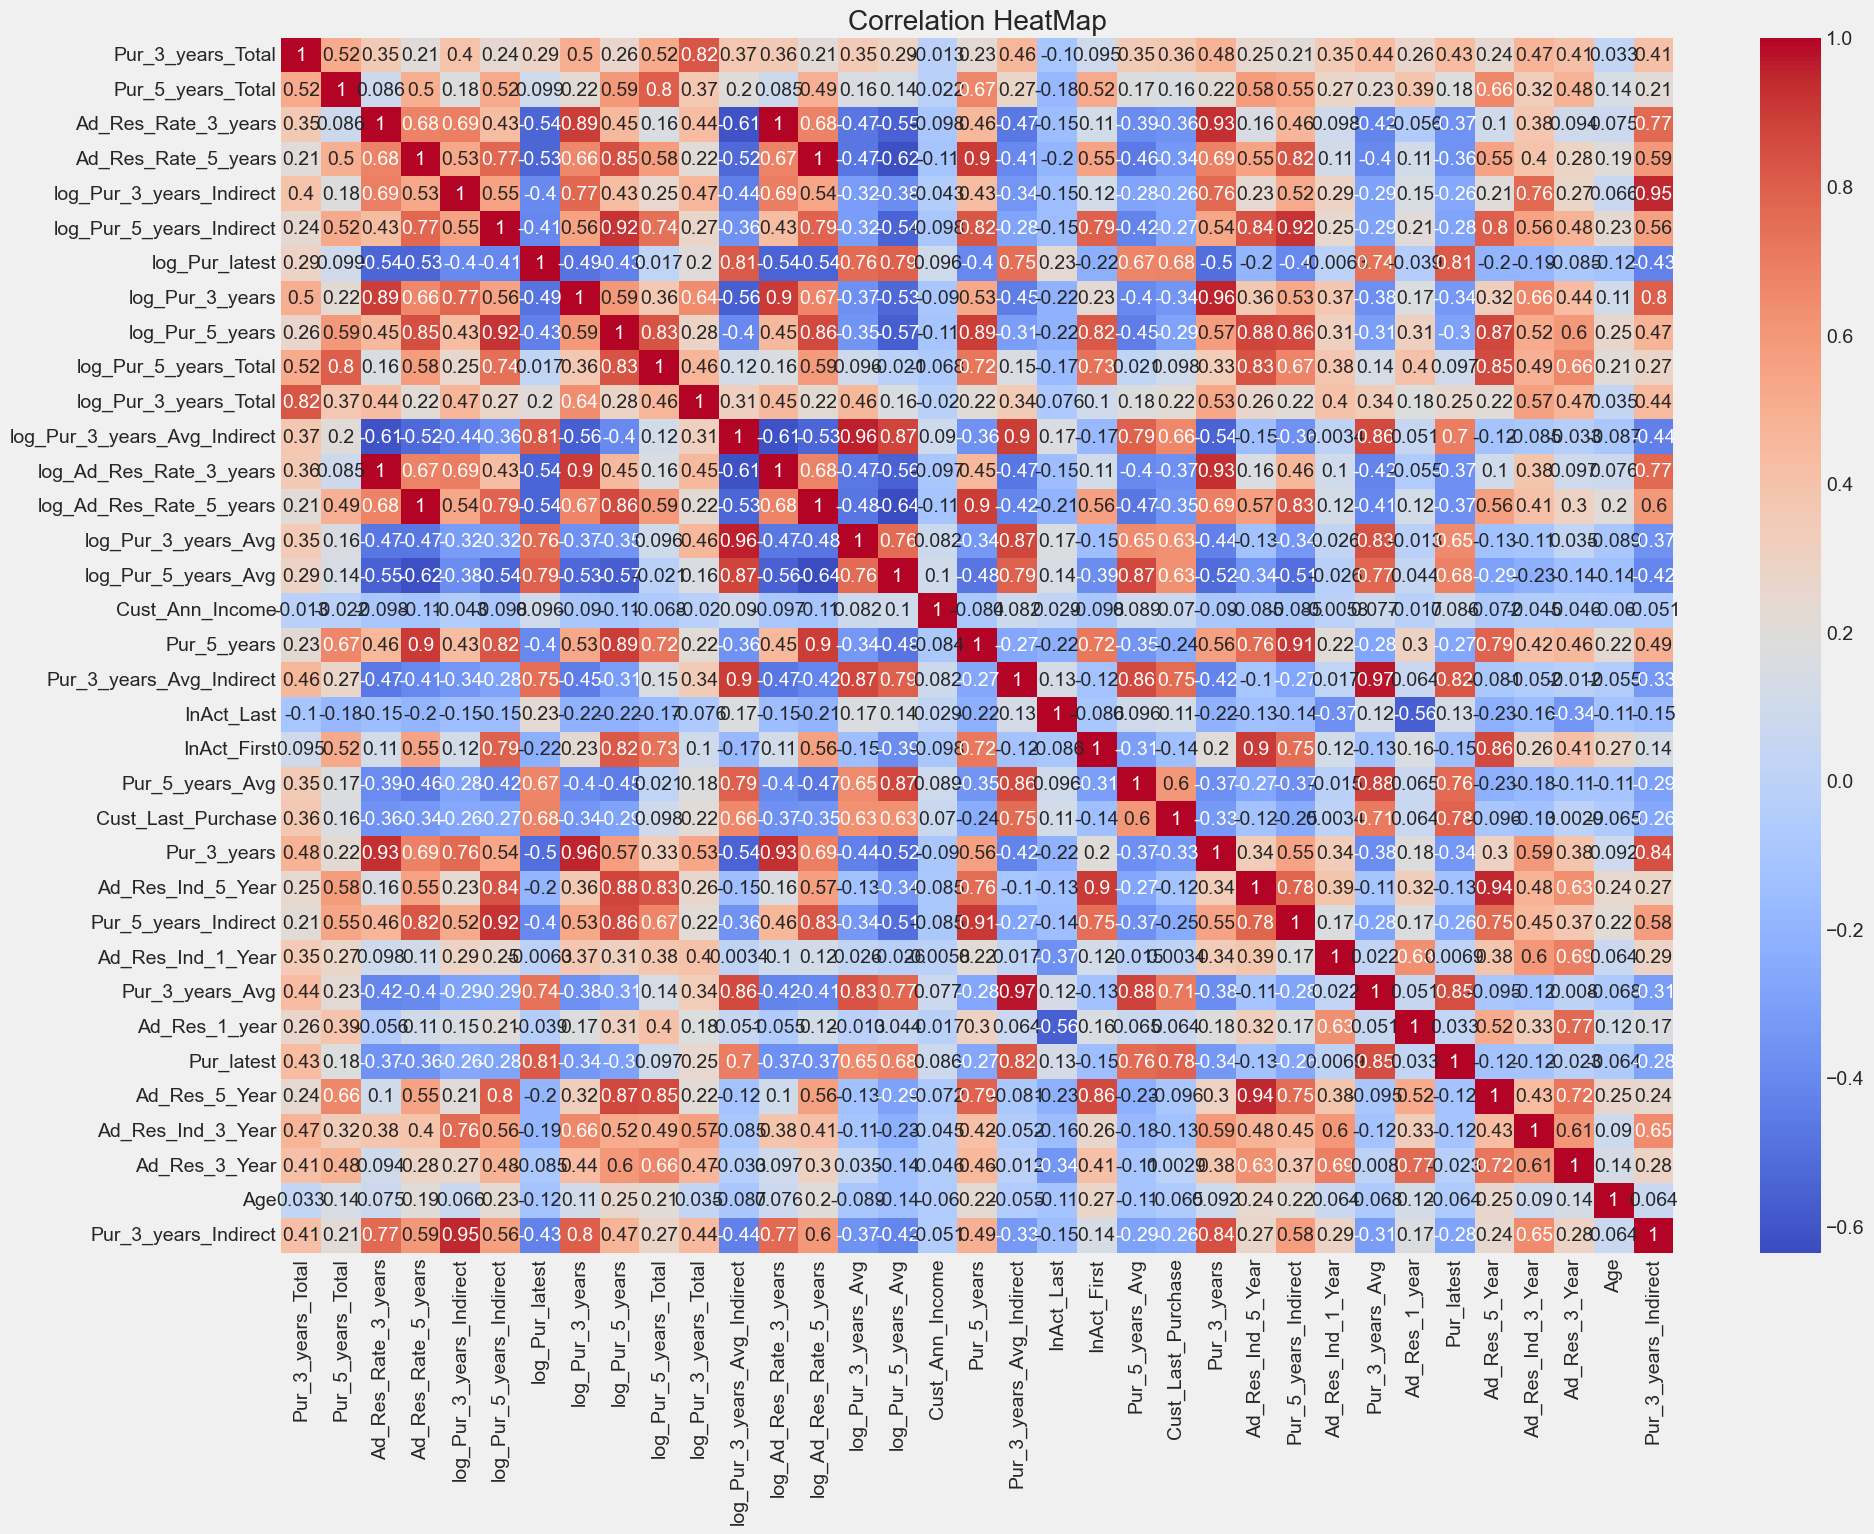

In [55]:
plt.figure(figsize=(20,15))
sns.heatmap(df[NewNumCols].corr(), cmap='coolwarm', annot=True, square=False)
plt.title('Correlation HeatMap');

# 5.0 Data Preprocessing

## 5.1 Split target (Y) and feature (X) variables

In [56]:
# Create list of the categorical features:
CatFes=list(set(CatCols)-set(['Potential_Customer']))

In [57]:
# Split Xs (features) and Y (target)

NewNumCols.remove('Cust_Last_Purchase')
Features=NewNumCols+CatFes
X=df[Features]
y=df['Potential_Customer']

## 5.2 Split data to train/test 

To avoid data leakage, we'll split the data into train and test sets before further preprocessing.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
                                 X, y, test_size=0.2, 
                                random_state=42, stratify=y)

# Check average purchase                                
avg_pur=df[(df.index.isin(X_train.index))&(df.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
avg_pur

14.743703358208956

## 5.3 Handle null values

In [59]:
# check which columns have null values. 
df.isna().sum()

Potential_Customer                 0
Cust_Last_Purchase              1444
Pur_3_years                        0
Pur_5_years                        0
Pur_3_years_Indirect               0
Pur_5_years_Indirect               0
Pur_latest                         0
Pur_3_years_Avg                    0
Pur_5_years_Avg                    0
Pur_3_years_Avg_Indirect         520
InAct_Last                         0
InAct_First                        0
Ad_Res_1_year                      0
Ad_Res_3_Year                      0
Ad_Res_5_Year                      0
Ad_Res_Ind_1_Year                  0
Ad_Res_Ind_3_Year                  0
Ad_Res_Ind_5_Year                  0
Status_Cust                        0
Status_Latest_Ad                   0
Age                                0
Gender                             0
Cust_Prop                          0
Cust_Ann_Income                    0
Status_Cust_new                    0
Pur_5_years_Total                  0
Pur_3_years_Total                  0
A

In [60]:
# impute with 0 or median. 
X_train.Pur_3_years_Avg_Indirect = X_train.Pur_3_years_Avg_Indirect.fillna(0)
X_test.Pur_3_years_Avg_Indirect = X_test.Pur_3_years_Avg_Indirect.fillna(0)

X_train.log_Pur_3_years_Avg_Indirect = X_train.log_Pur_3_years_Avg_Indirect.fillna(0)
X_test.log_Pur_3_years_Avg_Indirect = X_test.log_Pur_3_years_Avg_Indirect.fillna(0)

X_train.Age = X_train.Age.fillna(int(X_train.Age.median())).astype(int)
X_test.Age = X_test.Age.fillna(int(X_train.Age.median())).astype(int)

# final check for null values
X_train.isna().sum()

Pur_3_years_Total               0
Pur_5_years_Total               0
Ad_Res_Rate_3_years             0
Ad_Res_Rate_5_years             0
log_Pur_3_years_Indirect        0
log_Pur_5_years_Indirect        0
log_Pur_latest                  0
log_Pur_3_years                 0
log_Pur_5_years                 0
log_Pur_5_years_Total           0
log_Pur_3_years_Total           0
log_Pur_3_years_Avg_Indirect    0
log_Ad_Res_Rate_3_years         0
log_Ad_Res_Rate_5_years         0
log_Pur_3_years_Avg             0
log_Pur_5_years_Avg             0
Cust_Ann_Income                 0
Pur_5_years                     0
Pur_3_years_Avg_Indirect        0
InAct_Last                      0
InAct_First                     0
Pur_5_years_Avg                 0
Pur_3_years                     0
Ad_Res_Ind_5_Year               0
Pur_5_years_Indirect            0
Ad_Res_Ind_1_Year               0
Pur_3_years_Avg                 0
Ad_Res_1_year                   0
Pur_latest                      0
Ad_Res_5_Year 

## 5.4 Create Dummy Variables

In [61]:
# dummy variables for categorical variables. 
X_train= pd.get_dummies(X_train, drop_first=True).reset_index(drop=True)
X_test= pd.get_dummies(X_test, drop_first=True).reset_index(drop=True)

## 5.5 Feature Scaling

In [62]:
# Power Transformer
scaler_pw=PowerTransformer().fit(X_train[NewNumCols])
X_train_pw=pd.DataFrame(scaler_pw.transform(X_train[NewNumCols]), columns=NewNumCols)
X_test_pw=pd.DataFrame(scaler_pw.transform(X_test[NewNumCols]), columns=NewNumCols)
X_train_pw.index=X_train.index
X_test_pw.index=X_test.index
train_pw=pd.concat([X_train_pw, X_train[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]],axis=1)
test_pw=pd.concat([X_test_pw, X_test[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)

In [63]:
# MinMax Scaler
scaler=MinMaxScaler().fit(X_train)
X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 6.0 Feature Selection (PCA)

In [64]:
# PCA on Numerical Columns only
train_PCA=X_train_sc[NewNumCols]
test_PCA=X_test_sc[NewNumCols]

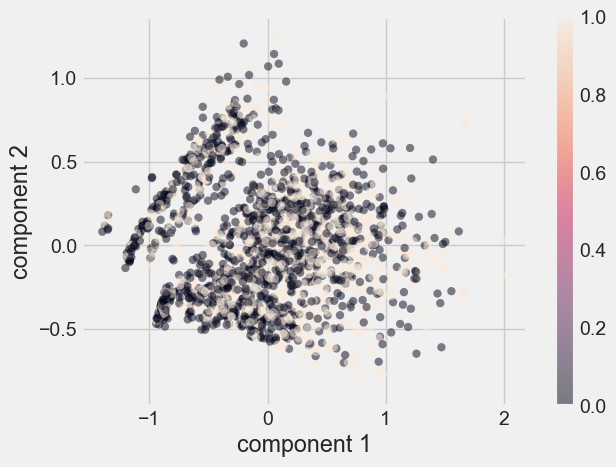

In [65]:
pca = PCA(2)  # project from 34 to 2 dimensions
projected = pca.fit_transform(train_PCA)
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

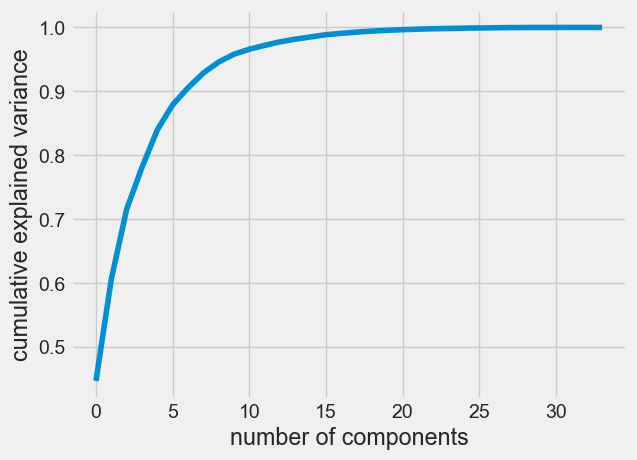

In [87]:
# We'll go with 15 as the ideal number of components after PCA
pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [88]:
pca=PCA(n_components=15).fit(train_PCA)
PCA_train=pd.DataFrame(pca.transform(train_PCA))
PCA_train.index=X_train.index
PCA_test=pd.DataFrame(pca.transform(test_PCA))
PCA_test.index=X_test.index

X_train_pca=pd.concat([PCA_train, X_train[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)
X_test_pca=pd.concat([PCA_test, X_test[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)

# 7.0 Model building (Machine Learning)

## 7.1 KNN, Logistic Regression, Decision Tree

### 7.1.1 Main

In [94]:
def best_model(train,test,y_train,y_test, model, params,CV=3, **kwargs):
    param_grid = params
    grid = GridSearchCV(model, param_grid, cv=CV, 
                        scoring = 'roc_auc', return_train_score=True)
    grid.fit(train, y_train)
    best_par=grid.best_params_
    best_model = grid.best_estimator_.fit(train,y_train)
    pred=best_model.predict(test)
    F1 = f1_score(y_test, pred)
    best_sc = grid.best_score_
    conf_matrix=confusion_matrix(y_test, pred)
    report=classification_report(y_test, pred)
    return best_par, best_model, best_sc, F1,conf_matrix,report

In [95]:
train_list=[X_train, train_pw,X_train_pca]
test_list=[X_test,test_pw ,X_test_pca]
data_names=['normal', 'powertransform','pca_trans']

models=[KNeighborsClassifier(), DecisionTreeClassifier(), 
       LogisticRegression(solver='saga', max_iter=800)]

knn_param_grid = {'n_neighbors': np.arange(10, 50),
                  'weights':['uniform','distance'],
                  'p': [1,2]}

dt_param_grid = {'max_depth': np.arange(5, 20)}

lr_param_grid = {'C': [0.001, 0.01, 1, 10, 100],
                  'penalty' :['l1','l2']}

params=[knn_param_grid, dt_param_grid,  lr_param_grid]

In [68]:
results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'TN':[],'FN':[],'FP':[],'TP':[],
                      'F1':[], 'value':[], 'revenue':[]})
i=0
c=5 #cost of ad
for m,p in zip(models, params):
    for tr,te,name in zip(train_list, test_list,data_names ):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        best_m,best_p,best_sc,F1,conf_matrix,report=best_model(tr,te,y_train,y_test, m, p,CV=3)
        results.loc[i,'best_m']=str(best_m)
        results.loc[i,'best_p']=str(best_p)
        results.loc[i,'best_sc']=round(best_sc,2)
        results.loc[i,'F1']=round(F1,2)
        results.loc[i,'TN']=conf_matrix[0,0]
        results.loc[i,'FN']=conf_matrix[0,1]
        results.loc[i,'FP']=conf_matrix[1,0]
        results.loc[i,'TP']=conf_matrix[1,1]
        cost=(conf_matrix[1,0]+conf_matrix[1,1])*c
        lost=conf_matrix[0,1]*avg_pur
        gain=conf_matrix[1,1]*avg_pur
        value=gain-cost-lost
        revenue= gain-cost
        results.loc[i,'value']=round(value,2)
        results.loc[i,'revenue']=round(revenue)
        print('data: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}, F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}\n value: {:.2f} \n revenue: {:.2f}'.\
             format(str(name),best_m,best_p,best_sc,F1,conf_matrix,report,value,revenue))
        print('\n***********************************\n')
        i=i+1

### 7.1.2 Threshold-Moving

In [191]:
def best_model(train,test,y_train,y_test, model, params,CV=5, **kwargs):
    param_grid = params
    grid = GridSearchCV(model, param_grid, cv=CV, 
                        scoring = 'roc_auc', return_train_score=True)
    grid.fit(train, y_train)
    best_par=grid.best_params_
    best_model = grid.best_estimator_.fit(train,y_train)

    # Obtain the predicted probabilities for each class on the test set
    probs=best_model.predict_proba(test)

    # Define a range of threshold values to try
    thresholds = np.arange(0.31, 0.5, 0.01)

    # Initialize variables to store the best threshold and best accuracy
    best_threshold = None
    best_score = 0

    # Iterate over the threshold values and evaluate the model's performance
    for threshold in thresholds:
        preds = (probs[:,1] > threshold).astype(int)
        score = accuracy_score(y_test, preds)
        if score > best_score:
            best_threshold = threshold
            best_score = score

    # Use the best threshold to predict the test set and evaluate the model's performance
    preds = (best_model.predict_proba(test)[:,1] > best_threshold).astype(int)
    
    F1 = f1_score(y_test, preds)
    best_sc = grid.best_score_
    conf_matrix=confusion_matrix(y_test, preds)
    report=classification_report(y_test, preds)
    return best_par, best_model, best_sc, F1,conf_matrix,report, best_threshold

In [192]:
train_list=[X_train, train_pw,X_train_pca]
test_list=[X_test,test_pw ,X_test_pca]
data_names=['normal', 'powertransform','pca_trans']

models=[KNeighborsClassifier(), DecisionTreeClassifier(), 
       LogisticRegression(solver='saga', max_iter=800)]

knn_param_grid = {'n_neighbors': np.arange(10, 50),
                  'weights':['uniform','distance'],
                  'p': [1,2]}

dt_param_grid = {'max_depth': np.arange(5, 20)}

lr_param_grid = {'C': [0.001, 0.01, 1, 10, 100],
                  'penalty' :['l1','l2']}

params=[knn_param_grid, dt_param_grid,  lr_param_grid]

In [193]:
results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'TN':[],'FN':[],'FP':[],'TP':[],
                      'F1':[], 'value':[], 'revenue':[], 'best_threshold':[]})
i=0
c=5 #cost of ad
for m,p in zip(models, params):
    for tr,te,name in zip(train_list, test_list,data_names ):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        best_m,best_p,best_sc,F1,conf_matrix,report,best_threshold=best_model(tr,te,y_train,y_test, m, p,CV=3)
        results.loc[i,'best_m']=str(best_m)
        results.loc[i,'best_p']=str(best_p)
        results.loc[i,'best_sc']=round(best_sc,2)
        results.loc[i,'F1']=round(F1,2)
        results.loc[i,'TN']=conf_matrix[0,0]
        results.loc[i,'FN']=conf_matrix[0,1]
        results.loc[i,'FP']=conf_matrix[1,0]
        results.loc[i,'TP']=conf_matrix[1,1]
        results.loc[i,'best_threshold']=best_threshold
        cost=(conf_matrix[1,0]+conf_matrix[1,1])*c
        lost=conf_matrix[0,1]*avg_pur
        gain=conf_matrix[1,1]*avg_pur
        value=gain-cost-lost
        revenue= gain-cost
        results.loc[i,'value']=round(value,2)
        results.loc[i,'revenue']=round(revenue)
        print('best threshold: {}\ndata: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}, F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}\n value: {:.2f} \n revenue: {:.2f}'.\
             format(best_threshold,str(name),best_m,best_p,best_sc,F1,conf_matrix,report,value,revenue))
        print('\n***********************************\n')
        i=i+1

best threshold: 0.46000000000000013
data: normal
best model: {'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
best param: KNeighborsClassifier(n_neighbors=18, p=1, weights='distance')
best score = 0.52, F1 = 0.54
confusion matrix: 
[[129 160]
 [110 158]]        
 classification report: 
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       289
           1       0.50      0.59      0.54       268

    accuracy                           0.52       557
   macro avg       0.52      0.52      0.51       557
weighted avg       0.52      0.52      0.51       557

 value: -1369.49 
 revenue: 989.51

***********************************

best threshold: 0.49000000000000016
data: powertransform
best model: {'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}
best param: KNeighborsClassifier(n_neighbors=49)
best score = 0.60, F1 = 0.51
confusion matrix: 
[[190  99]
 [142 126]]        
 classification report: 
              precision    recall  f1-

## 7.2 XgBoost

### 7.2.1 Main

In [194]:
def best_model(train,test,y_train,y_test, model, params,CV=5, **kwargs):
    param_grid = params
    stf_kf=StratifiedKFold(n_splits=5)
    rscv = RandomizedSearchCV(model,
                            param_distributions=param_grid,
                            cv=stf_kf,
                            n_jobs=-1,
                            scoring='roc_auc',
                            random_state=42)
    rscv.fit(train, y_train)
    best_par=rscv.best_params_
    best_model = rscv.best_estimator_.fit(train,y_train)
    pred=best_model.predict(test)
    F1 = f1_score(y_test, pred)
    best_sc = rscv.best_score_
    conf_matrix=confusion_matrix(y_test, pred)
    report=classification_report(y_test, pred)
    return best_par, best_model, best_sc, F1,conf_matrix,report

In [195]:
train_list=[X_train, train_pw,X_train_pca]
test_list=[X_test,test_pw ,X_test_pca]
data_names=['normal', 'powertransform','pca_trans']

models= [xgb.XGBClassifier(n_estimators=50,n_jobs=-1)]

xgb_param_grid = {
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05)
         }

params = [xgb_param_grid]

In [196]:
results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'TN':[],'FN':[],'FP':[],'TP':[],
                      'F1':[], 'value':[], 'revenue':[]})
i=0
c=5 #cost of ad
for m,p in zip(models, params):
    for tr,te,name in zip(train_list, test_list,data_names ):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        best_m,best_p,best_sc,F1,conf_matrix,report=best_model(tr,te,y_train,y_test, m, p,CV=5)
        results.loc[i,'best_m']=str(best_m)
        results.loc[i,'best_p']=str(best_p)
        results.loc[i,'best_sc']=round(best_sc,2)
        results.loc[i,'F1']=round(F1,2)
        results.loc[i,'TN']=conf_matrix[0,0]
        results.loc[i,'FN']=conf_matrix[0,1]
        results.loc[i,'FP']=conf_matrix[1,0]
        results.loc[i,'TP']=conf_matrix[1,1]
        cost=(conf_matrix[1,0]+conf_matrix[1,1])*c
        lost=conf_matrix[0,1]*avg_pur
        gain=conf_matrix[1,1]*avg_pur
        value=gain-cost-lost
        revenue= gain-cost
        results.loc[i,'value']=round(value,2)
        results.loc[i,'revenue']=round(revenue)
        print('data: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}, F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}\n value: {:.2f} \n revenue: {:.2f}'.\
             format(str(name),best_m,best_p,best_sc,F1,conf_matrix,report,value,revenue))
        print('\n***********************************\n')
        i=i+1

data: normal
best model: {'subsample': 0.7, 'min_child_weight': 3, 'max_depth': 1, 'learning_rate': 0.085, 'gamma': 0.8999999999999999, 'colsample_bytree': 0.7000000000000002}
best param: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7000000000000002, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8999999999999999, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.085, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=1, max_leaves=0,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)
best score = 0.60, F1 = 0.50
confusion matrix: 
[[194  9

### 7.2.2 Threshold-Moving

In [197]:
# Best model, Main
# try a random threshold (proba < 0.50) and scale pos weight
stf_kf=StratifiedKFold(n_splits=5)
xgb_classifier=xgb.XGBClassifier(n_estimators=250,n_jobs=-1)
params={
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05), 
         'scale_pos_weight': np.arange(0.40, 0.499, 0.01)}
rs_cv_classifier=RandomizedSearchCV(xgb_classifier,
                                    param_distributions=params,
                                    cv=stf_kf,
                                    n_jobs=-1,
                                    scoring='roc_auc',
                                    random_state=22)
rs_cv_classifier.fit(X_train,y_train)

# Obtain the predicted probabilities for each class on the test set
probs=rs_cv_classifier.predict_proba(X_test)

# Set the decision threshold to 0.40 (default is 0.5)
threshold = 0.27

# Use a binary classification threshold function to adjust the threshold
preds = (probs[:,1] > threshold).astype(int)

print("Best Parameter: \n",rs_cv_classifier.best_params_)
print("XGBClassifier Acc Score: ",accuracy_score(y_test, preds))
print("XGBClassifier Recall Score: ",recall_score(y_test, preds))
print('XGBRF Classifier confusion matrix on test data  \n', confusion_matrix(y_test, preds))
print('_____________________________________________________')
print("")
print('Classification Report  on test data ')
print(classification_report(y_test, preds))
print('_____________________________________________________')
print("")

Best Parameter: 
 {'subsample': 0.8, 'scale_pos_weight': 0.4, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.7, 'colsample_bytree': 0.15000000000000002}
XGBClassifier Acc Score:  0.5296229802513465
XGBClassifier Recall Score:  0.6716417910447762
XGBRF Classifier confusion matrix on test data  
 [[115 174]
 [ 88 180]]
_____________________________________________________

Classification Report  on test data 
              precision    recall  f1-score   support

           0       0.57      0.40      0.47       289
           1       0.51      0.67      0.58       268

    accuracy                           0.53       557
   macro avg       0.54      0.53      0.52       557
weighted avg       0.54      0.53      0.52       557

_____________________________________________________



In [203]:
def best_model(train,test,y_train,y_test, model, params,CV=5, **kwargs):
    param_grid = params
    stf_kf=StratifiedKFold(n_splits=5)
    rscv = RandomizedSearchCV(model,
                            param_distributions=param_grid,
                            cv=stf_kf,
                            n_jobs=-1,
                            scoring='roc_auc',
                            random_state=42)
    rscv.fit(train, y_train)
    best_par=rscv.best_params_
    best_model = rscv.best_estimator_.fit(train,y_train)

    # Obtain the predicted probabilities for each class on the test set
    probs=best_model.predict_proba(test)

    # Define a range of threshold values to try
    thresholds = np.arange(0, 0.40, 0.01)

    # Initialize variables to store the best threshold and best accuracy
    best_threshold = None
    best_score = 0

    # Iterate over the threshold values and evaluate the model's performance
    for threshold in thresholds:
        preds = (probs[:,1] > threshold).astype(int)
        score = accuracy_score(y_test, preds)
        if score > best_score:
            best_threshold = threshold
            best_score = score

    # Use the best threshold to predict the test set and evaluate the model's performance
    preds = (best_model.predict_proba(test)[:,1] > best_threshold).astype(int)
    
    F1 = f1_score(y_test, preds)
    best_sc = rscv.best_score_
    conf_matrix=confusion_matrix(y_test, preds)
    report=classification_report(y_test, preds)
    return best_par, best_model, best_sc, F1,conf_matrix,report, best_threshold

In [204]:
train_list=[X_train, train_pw,X_train_pca]
test_list=[X_test,test_pw ,X_test_pca]
data_names=['normal', 'powertransform','pca_trans']

models= [xgb.XGBClassifier(n_estimators=750,n_jobs=-1, random_state=42)]

xgb_param_grid = {
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05)
         }

params = [xgb_param_grid]

In [205]:
results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'TN':[],'FN':[],'FP':[],'TP':[],
                      'F1':[], 'value':[], 'revenue':[], 'best_threshold':[]})
i=0
c=5 #cost of ad
for m,p in zip(models, params):
    for tr,te,name in zip(train_list, test_list,data_names ):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        best_m,best_p,best_sc,F1,conf_matrix,report,best_threshold=best_model(tr,te,y_train,y_test, m, p,CV=3)
        results.loc[i,'best_m']=str(best_m)
        results.loc[i,'best_p']=str(best_p)
        results.loc[i,'best_sc']=round(best_sc,2)
        results.loc[i,'F1']=round(F1,2)
        results.loc[i,'TN']=conf_matrix[0,0]
        results.loc[i,'FN']=conf_matrix[0,1]
        results.loc[i,'FP']=conf_matrix[1,0]
        results.loc[i,'TP']=conf_matrix[1,1]
        results.loc[i,'best_threshold']=best_threshold
        cost=(conf_matrix[1,0]+conf_matrix[1,1])*c
        lost=conf_matrix[0,1]*avg_pur
        gain=conf_matrix[1,1]*avg_pur
        value=gain-cost-lost
        revenue= gain-cost
        results.loc[i,'value']=round(value,2)
        results.loc[i,'revenue']=round(revenue)
        print('best threshold: {}\ndata: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}, F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}\n value: {:.2f} \n revenue: {:.2f}'.\
             format(best_threshold,str(name),best_m,best_p,best_sc,F1,conf_matrix,report,value,revenue))
        print('\n***********************************\n')
        i=i+1

best threshold: 0.34
data: normal
best model: {'subsample': 0.9000000000000001, 'min_child_weight': 8, 'max_depth': 1, 'learning_rate': 0.085, 'gamma': 0.7999999999999999, 'colsample_bytree': 0.6000000000000002}
best param: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.6000000000000002, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7999999999999999, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.085, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=1, max_leaves=0,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, ...)
best score = 0.59,

# Best ML Model vs Default Solution

We'll now compare our best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.

In [93]:
# default solution
default_revenue = df[df.index.isin(X_test.index)].Cust_Last_Purchase.sum()-c*len(X_test)
default_revenue

1463.0